<a href="https://colab.research.google.com/github/SABBIRAHAMMED3/ML/blob/main/DNNForFloodRouting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [2]:
def build_flood_routing_dnn(input_dim=193, output_dim=193, hidden_units=500, hidden_layers=100, dropout_rate=0.2):
    model = Sequential()

    # Input layer
    model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))

    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(output_dim))

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

In [3]:
import pandas as pd
x= pd.read_csv('/content/Inflow.csv')
x.shape

(193, 10)

In [4]:
y= pd.read_csv('/content/Inflow.csv')
y.shape

(193, 10)

In [5]:
x.head()

,inflow01,inflow02,inflow03,inflow04,inflow05,inflow06,inflow07,inflow08,inflow09,inflow10
0,100.0,150.00,100.0,200.00,100.00,100.00,150.0,200.00,150.00,200.00
1,462.5,268.75,120.0,206.25,103.33,105.56,162.5,205.88,153.33,216.67
2,825.0,387.50,140.0,212.50,106.67,111.11,175.0,211.76,156.67,233.33
3,1187.5,506.25,160.0,218.75,110.00,116.67,187.5,217.65,160.00,250.00
4,1550.0,625.00,180.0,225.00,113.33,122.22,200.0,223.53,163.33,258.33


In [6]:
x=x.values.reshape(193,10)
y=y.values.reshape(193,10)

In [7]:
x

array([[100.  , 150.  , 100.  , ..., 200.  , 150.  , 200.  ],
       [462.5 , 268.75, 120.  , ..., 205.88, 153.33, 216.67],
       [825.  , 387.5 , 140.  , ..., 211.76, 156.67, 233.33],
       ...,
       [100.  , 100.  , 100.  , ..., 283.33, 111.25, 160.11],
       [100.  , 100.  , 100.  , ..., 266.67, 110.  , 158.99],
       [100.  , 100.  , 100.  , ..., 250.  , 108.75, 157.86]])

In [8]:
# Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

In [9]:
X_scaled.shape

(193, 10)

In [10]:
X_scaled=X_scaled.transpose()
y_scaled=y_scaled.transpose()

In [12]:
X_scaled.shape

(10, 193)

In [11]:
# Build the model
model = build_flood_routing_dnn()

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=200, batch_size=64, validation_split=0.2, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 88s 88s/step - loss: 0.1996 - mae: 0.3160 - val_loss: 0.2265 - val_mae: 0.3544
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - loss: 0.1982 - mae: 0.3148 - val_loss: 0.2235 - val_mae: 0.3510
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.1958 - mae: 0.3127 - val_loss: 0.2182 - val_mae: 0.3448
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.1915 - mae: 0.3087 - val_loss: 0.2069 - val_mae: 0.3324
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.1816 - mae: 0.3007 - val_loss: 0.1791 - val_mae: 0.3063
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 0.1579 - mae: 0.2815 - val_loss: 0.1151 - val_mae: 0.2566
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.1213 - mae: 0.2702 - val_loss: 0.1980 - val_mae: 0.3698
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.4079 - mae: 0.5238 - val_loss: 0.0948 - val_mae: 0.2370
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.1105 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        97,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 500)            │             

 Total params: 74,979,581 (286.02 MB)

 Trainable params: 24,993,193 (95.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,986,388 (190.68 MB)

In [14]:
# Evaluate the model
loss, mae = model.evaluate(X_scaled, y_scaled)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Predict
y_pred_scaled = model.predict(X_scaled)

#transpose

y_pred_scaled=y_pred_scaled.transpose()

# Inverse transform predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0781 - mae: 0.2335   
Test Loss: 0.0781, Test MAE: 0.2335
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


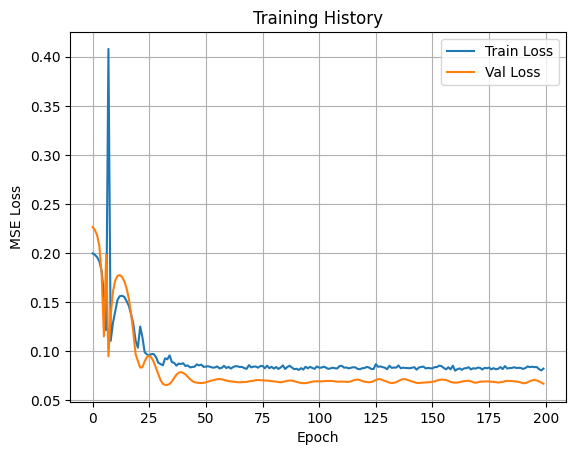

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training History')
plt.grid(True)
plt.show()

In [33]:
X_scaled.shape


(10, 193)

In [38]:
Y_predicted_scaled=model.predict(X_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [39]:
Y_predicted_scaled=Y_predicted_scaled.transpose()

In [40]:
Y_pred = scaler_y.inverse_transform(Y_predicted_scaled)

In [45]:
Y_pred=pd.DataFrame(Y_pred)
Y_pred.to_excel('predicted_values.xlsx')